In [ ]:
!wget 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

--2020-12-26 04:41:48--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.2’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-12-26 04:41:48 (34.0 MB/s) - ‘airline-passengers.csv.2’ saved [2180/2180]



In [ ]:
import pandas as pd
df=pd.read_csv('/content/'"airline-passengers.csv")

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


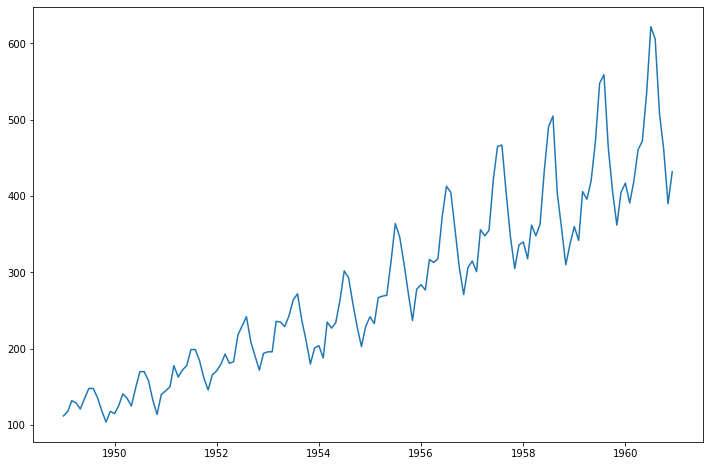

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.Passengers)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df["Passengers"].values)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df.head()

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May


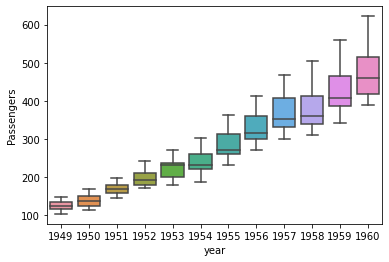

In [ ]:
import seaborn as sns
sns.boxplot(x='year', y='Passengers', data=df)

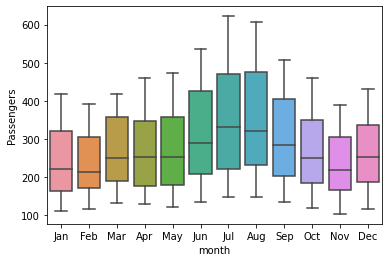

In [ ]:

sns.boxplot(x='month', y='Passengers', data=df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

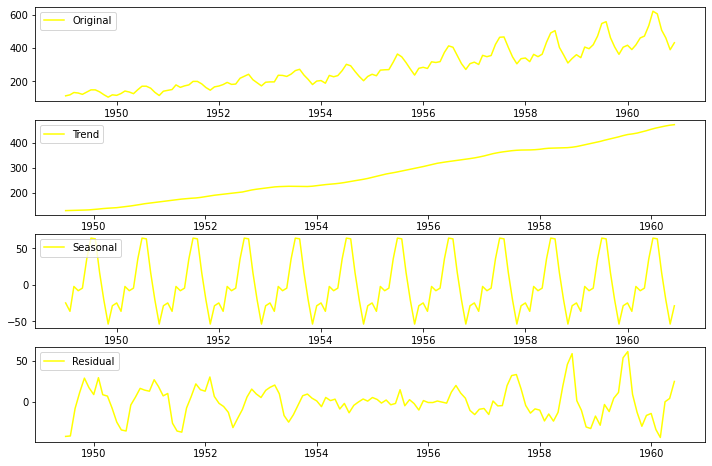

In [ ]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [ ]:
!wget 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'

--2020-12-26 05:04:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2020-12-26 05:04:16 (79.7 MB/s) - ‘daily-total-female-births.csv’ saved [6220/6220]



In [ ]:
df=pd.read_csv('/content/'"daily-total-female-births.csv")

In [ ]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


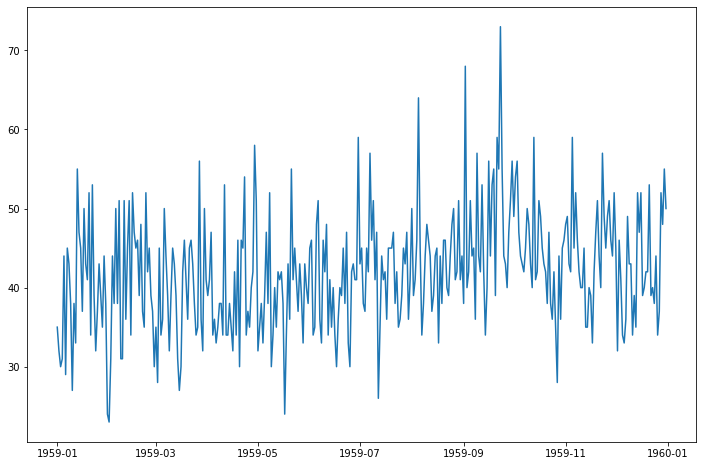

In [ ]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.figure(figsize=(12,8))
plt.plot(df.Births)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df["Births"].values)
print("pvalue = ", pvalue, " if above 0.05, data is stationary")

pvalue =  5.2434129901498554e-05  if above 0.05, data is stationary


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Births'],  
                            model ='additive')

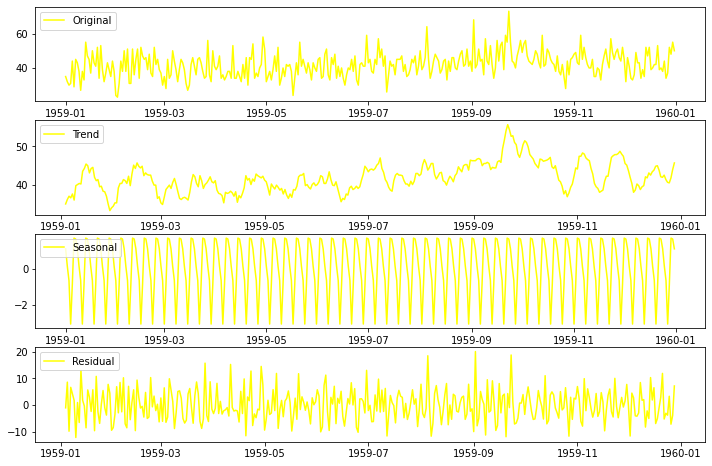

In [ ]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Births'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [ ]:
dataset = df['Passengers'].values

In [ ]:
dataset

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [ ]:
dataset=dataset.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)
dataset[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
dataset.shape, train.shape, test.shape

((144, 1), (95, 1), (49, 1))

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
import numpy as np


In [ ]:
seq_size = 10 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
trainX.shape,trainY.shape

((84, 10), (84,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 2s - loss: 0.0593 - acc: 0.0119 - val_loss: 0.2278 - val_acc: 0.0000e+00
Epoch 2/100
3/3 - 0s - loss: 0.0289 - acc: 0.0119 - val_loss: 0.1054 - val_acc: 0.0000e+00
Epoch 3/100
3/3 - 0s - loss: 0.0123 - acc: 0.0119 - val_loss: 0.0391 - val_acc: 0.0263
Epoch 4/100
3/3 - 0s - loss: 0.0063 - acc: 0.0119 - val_loss: 0.0239 - val_acc: 0.0263
Epoch 5/100
3/3 - 0s - loss: 0.0080 - acc: 0.0119 - val_loss: 0.0277 - val_acc: 0.0263
Epoch 6/100
3/3 - 0s - loss: 0.0093 - acc: 0.0119 - val_loss: 0.0257 - val_acc: 0.0263
Epoch 7/100
3/3 - 0s - loss: 0.0077 - acc: 0.0119 - val_loss: 0.0212 - val_acc: 0.0263
Epoch 8/100
3/3 - 0s - loss: 0.0058 - acc: 0.0119 - val_loss: 0.0192 - val_acc: 0.0263
Epoch 9/100
3/3 - 0s - loss: 0.0045 - acc: 0.0119 - val_loss: 0.0209 - val_acc: 0.0263
Epoch 10/100
3/3 - 0s - loss: 0.0042 - acc: 0.0119 - val_loss: 0.0241 - val_acc: 0.0263
Epoch 11/100
3/3 - 0s - loss: 0.0043 - acc: 0.0119 - val_loss: 0.0255 - val_acc: 0.0263
Epoch 12/100
3/3 - 0s - loss: 0.0

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])


In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.51 RMSE
Test Score: 21.96 RMSE


In [ ]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

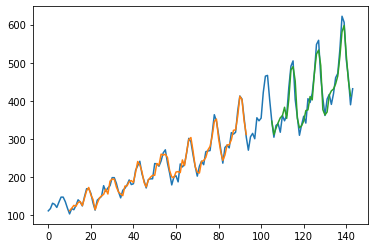

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()